In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from models.classical_ml import plot_feature_importances, pipeline
from src.preprocessing import clean_df, complete_df, X_y_global, X_y_multislice, multislice_consistent, rgcca_df
from src.visualize import visualize_slice_ranges, pca_factorial_plot, pca_loading_plot, pca_scree_plot, compute_several_plot, plot_correl, plot_phase_evolution
from src.parafac import compute_parafac

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Load the data under xlsx format
desc = pd.read_excel('../data/raw/Descriptif_patients.xlsx')
global_radio = pd.read_excel("../data/raw/radiomiques_global.xlsx") # "features" extraits de la segmentation 3D (donc associés à toute la lésion)
multislice = pd.read_excel("../data/raw/radiomiques_multislice.xlsx") #  "features" extraits de la segmentation 2D (donc associés à chaque coupe 2D où la lésion est présente)

### Data exploration

In [8]:
# Clean the data
desc_clean, global_radio_clean, multislice_clean = clean_df(desc, global_radio, multislice)

# We ensure only complete records are used 
global_radio_complete, multislice_complete = complete_df(global_radio_clean, multislice_clean)
multislice_consistent_df = multislice_consistent(multislice_complete, min_range=10)

# Prepare feature and target matrices
X_global, y_global = X_y_global(global_radio_complete)
X_multislice, y_multislice = X_y_multislice(multislice_consistent_df)

# Concatenate the two feature matrices
X_all = pd.concat([X_global, X_multislice], axis=1)

# Sanity check
print("Shape of X global:", X_global.shape)
print("Shape of y global:", y_global.shape)
print("Shape of X multislice:", X_multislice.shape)
print("Shape of y multislice:", y_multislice.shape)
print("Shape of X all:", X_all.shape)


Shape of X global: (117, 428)
Shape of y global: (117,)
Shape of X multislice: (31, 3720)
Shape of y multislice: (31,)
Shape of X all: (117, 4148)


### PCA

(428, 428)


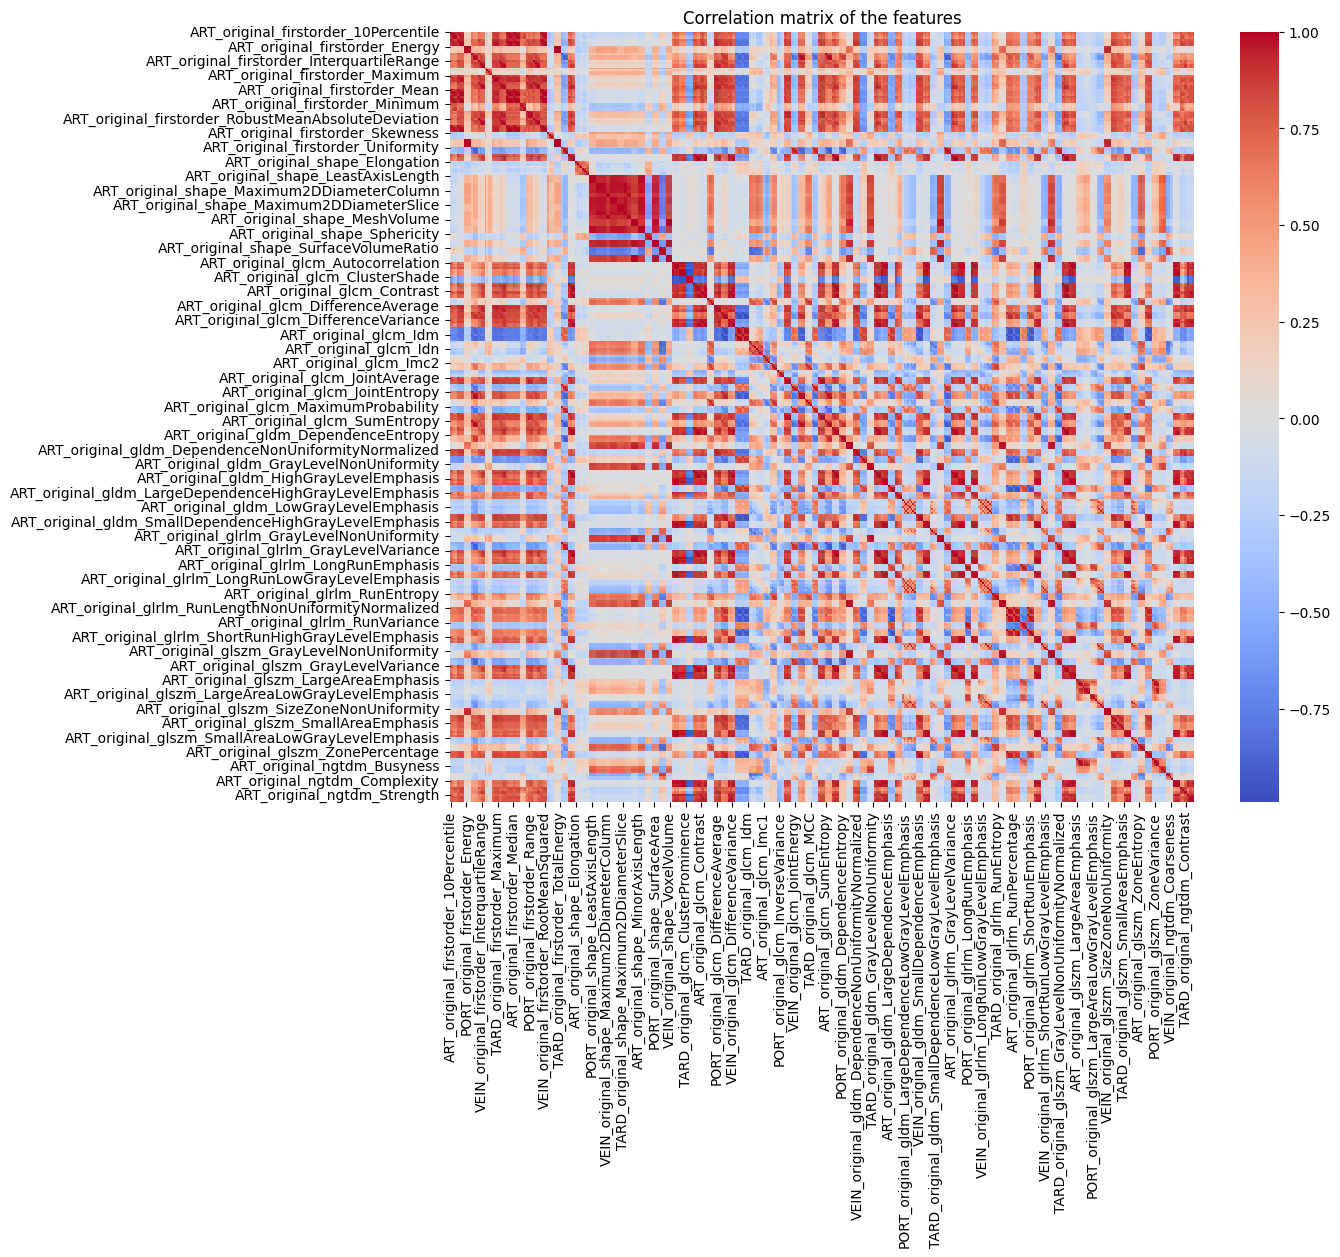

In [9]:
R = X_global.corr()
print(R.shape)
plt.figure(figsize=(12, 10))
sns.heatmap(R, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix of the features")
plt.show()

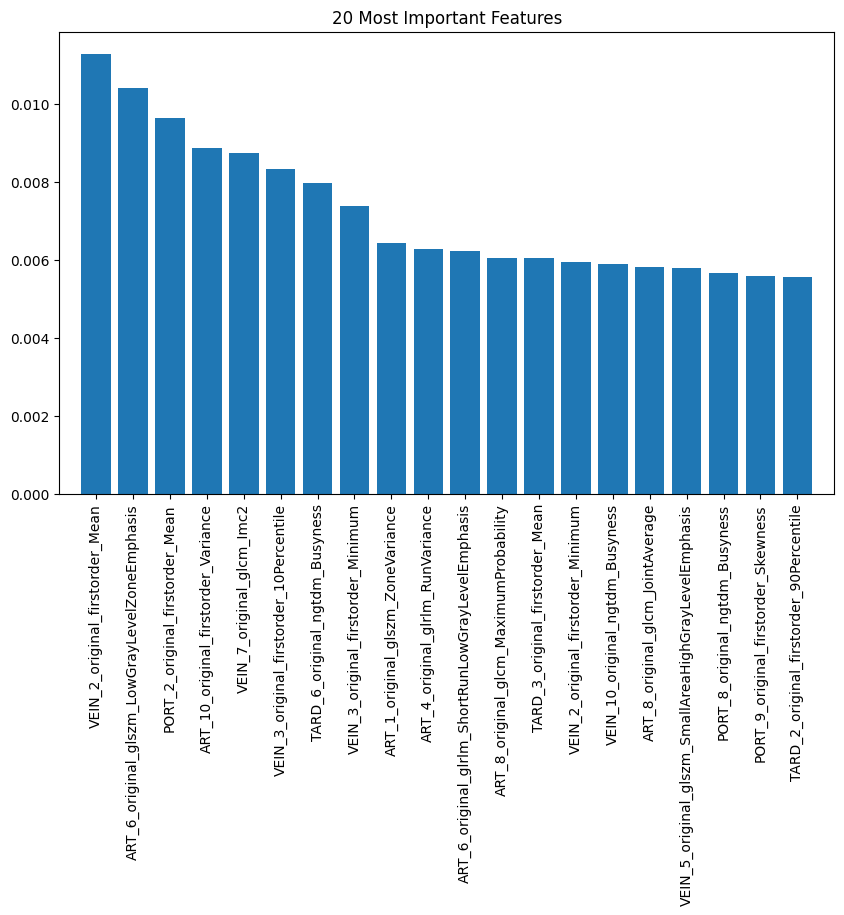

In [10]:
plot_feature_importances(X_multislice, y_multislice, k=20)

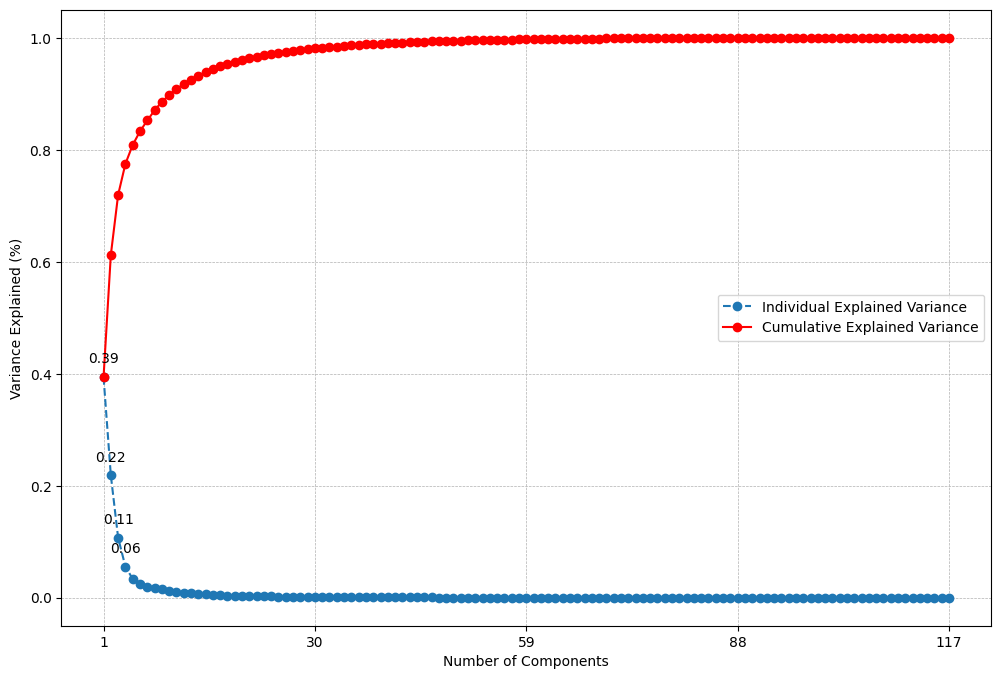

In [11]:
pca_scree_plot(X_global)

The plot helps in determining the number of components to retain for further analysis. A common approach is to choose the number of components that add up to a substantial cumulative variance, typically around 70-90%. This is evident from where the cumulative variance curve begins to plateau.

PCA is effective in reducing dimensionality while retaining most of the information. If the first few components explain most of the variance, it implies that they capture most of the essential information present in the original features, allowing for a reduction in complexity without significant loss of information.

Here we only keep the first five components.

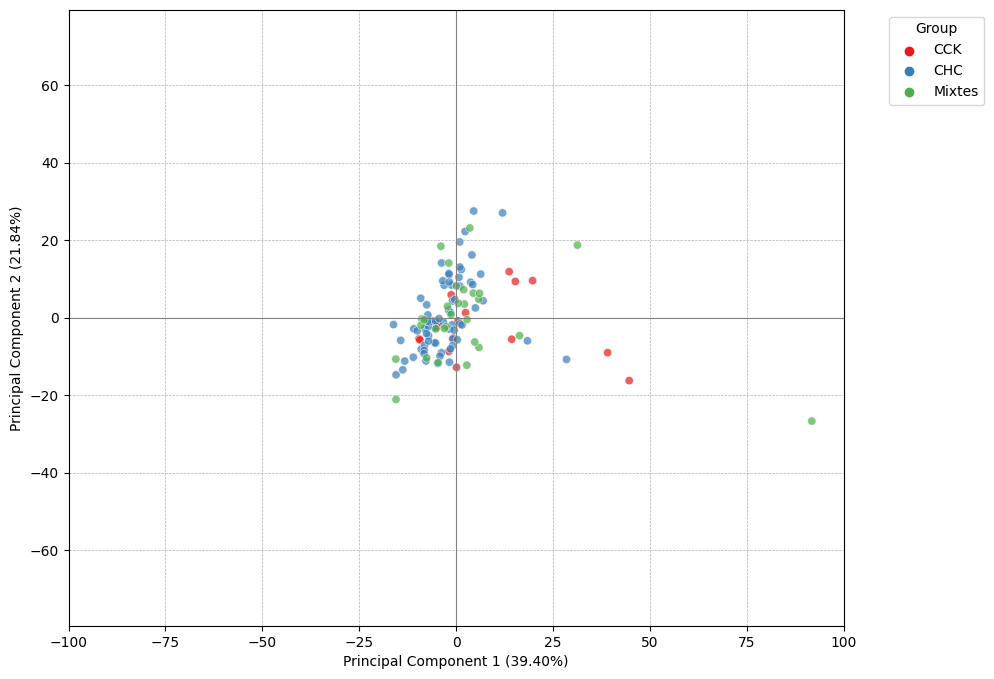

In [12]:
pca_factorial_plot(X_global, y_global)

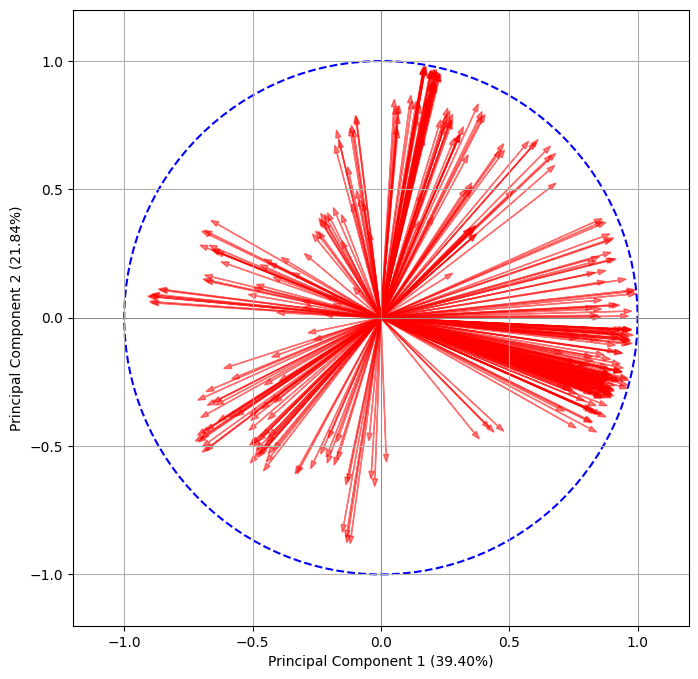

In [13]:
pca_loading_plot(X_global)

### RGCCA

(3720, 3720)


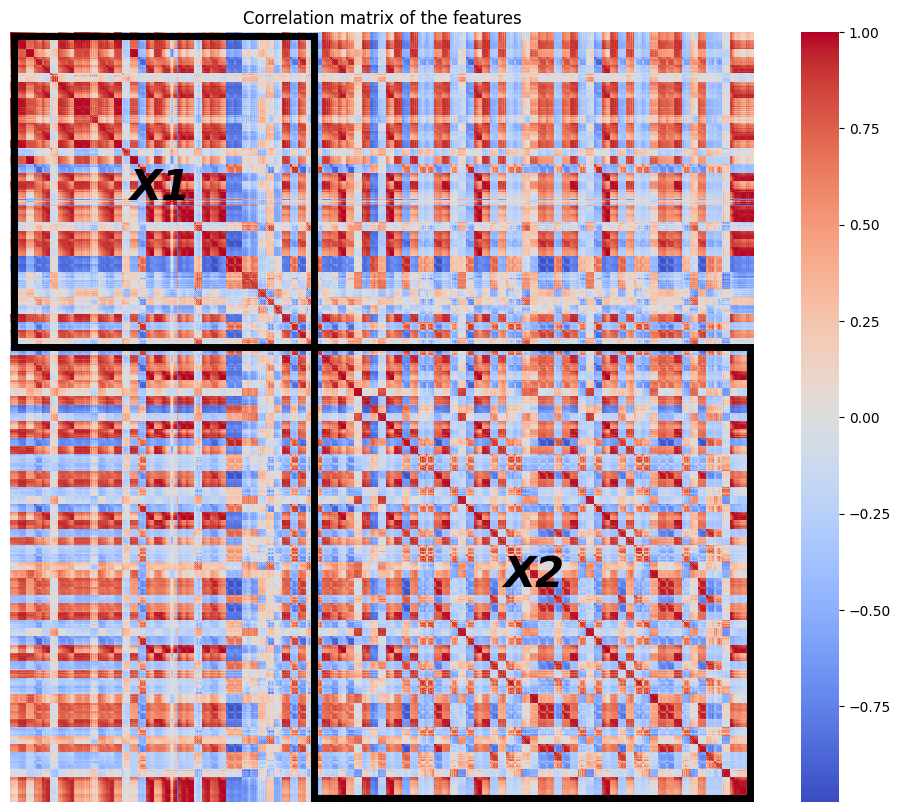

In [14]:
# Compute the correlation matrix
R_grouped = X_multislice.corr()
print(R_grouped.shape)

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(R_grouped, annot=False, cmap='coolwarm', fmt=".2f")
plt.xticks([])
plt.yticks([])
plt.gca().add_patch(plt.Rectangle((20,20), 1500, 1500, fill=False, edgecolor='black', lw=5))
plt.gca().add_patch(plt.Rectangle((1520,1520), 2180, 2180, fill=False, edgecolor='black', lw=5))
plt.title("Correlation matrix of the features")
plt.text(750, 750, 'X1', fontsize=30, fontweight='bold', fontstyle='italic', ha='center', va='center')
plt.text(2620, 2620, 'X2', fontsize=30, fontweight='bold', fontstyle='italic', ha='center', va='center')
plt.show()


The rest of the RGCCA study lies in the RGCCA.Rmd file. The data fitted for rgcca has been computed thanks to the rgcca_df function.

In [15]:
# This store a dataframe usable for RGCCA by R in data/processed.
X_rgcca_multislice = rgcca_df(X_multislice, y_multislice)

OSError: Cannot save file into a non-existent directory: 'data/processed'

### Analyse Multiway | CP/PARAFAC

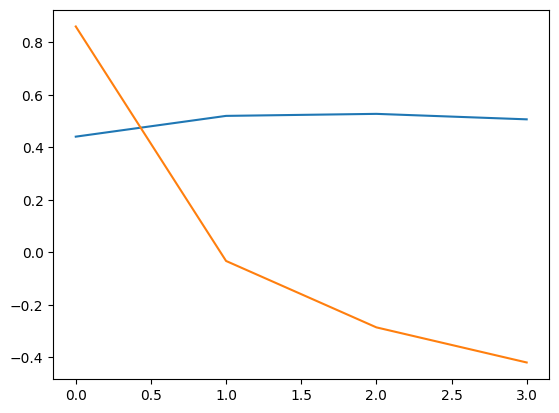

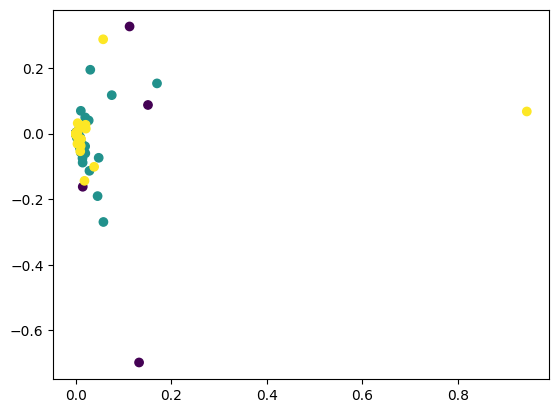

In [ ]:
compute_parafac(global_radio_clean)

### Simple ML models

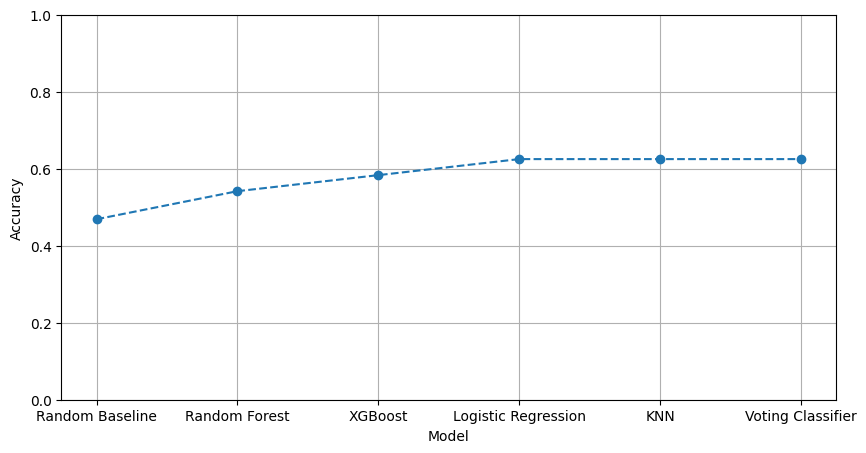

In [ ]:
sorted_model_names, sorted_accuracies = pipeline(X_global, y_global, apply_pca=False,)

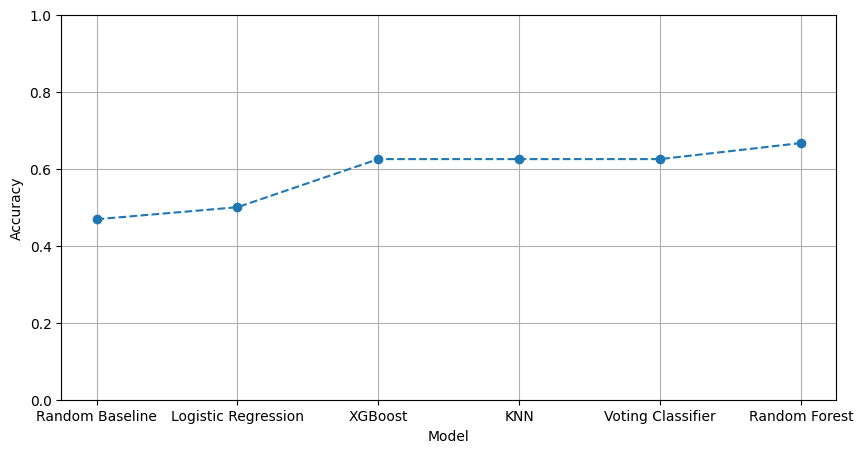

In [ ]:
# Example usage
sorted_model_names, sorted_accuracies = pipeline(X_global, y_global, apply_pca=True, n_components=15)

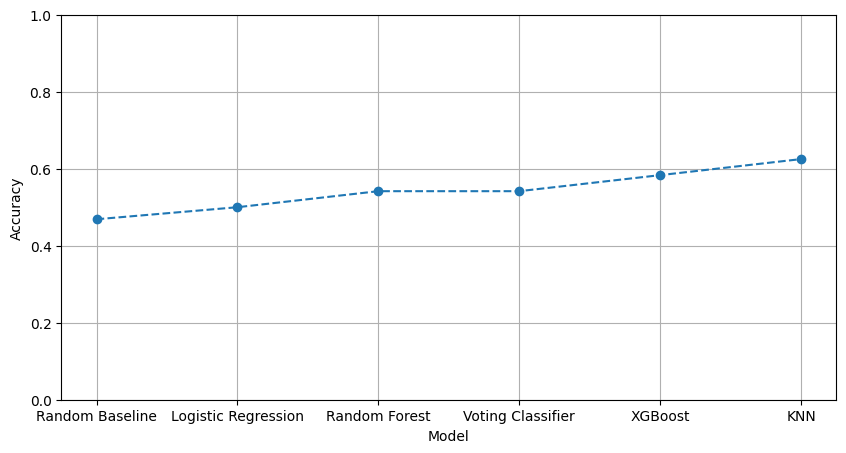

In [ ]:
# Example usage
sorted_model_names, sorted_accuracies = pipeline(X_global, y_global, apply_pca=False, n_components=15, sparse=True)

In [ ]:
sorted_accuracies

[0.46875,
 0.5,
 0.5416666666666666,
 0.5416666666666666,
 0.5833333333333334,
 0.625]

### Data Exploration

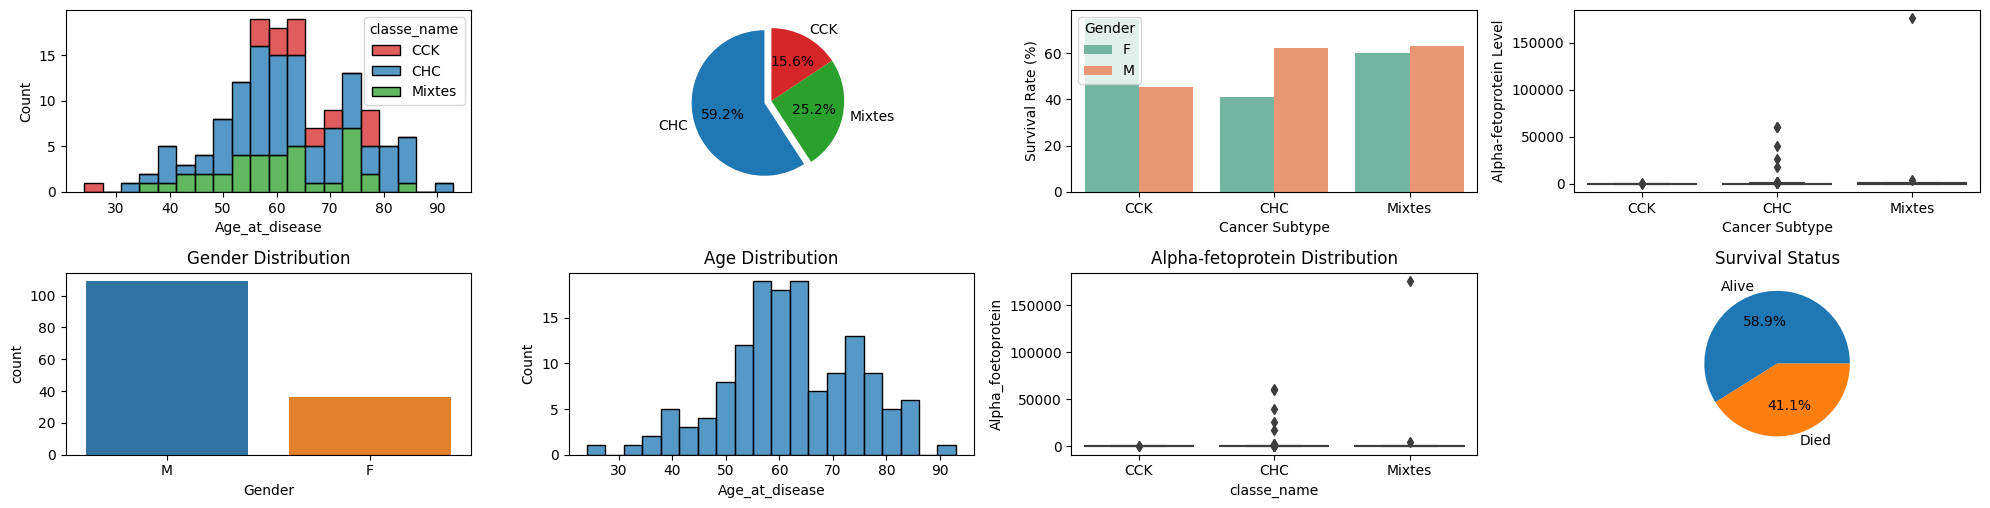

In [ ]:
compute_several_plot(desc_clean)

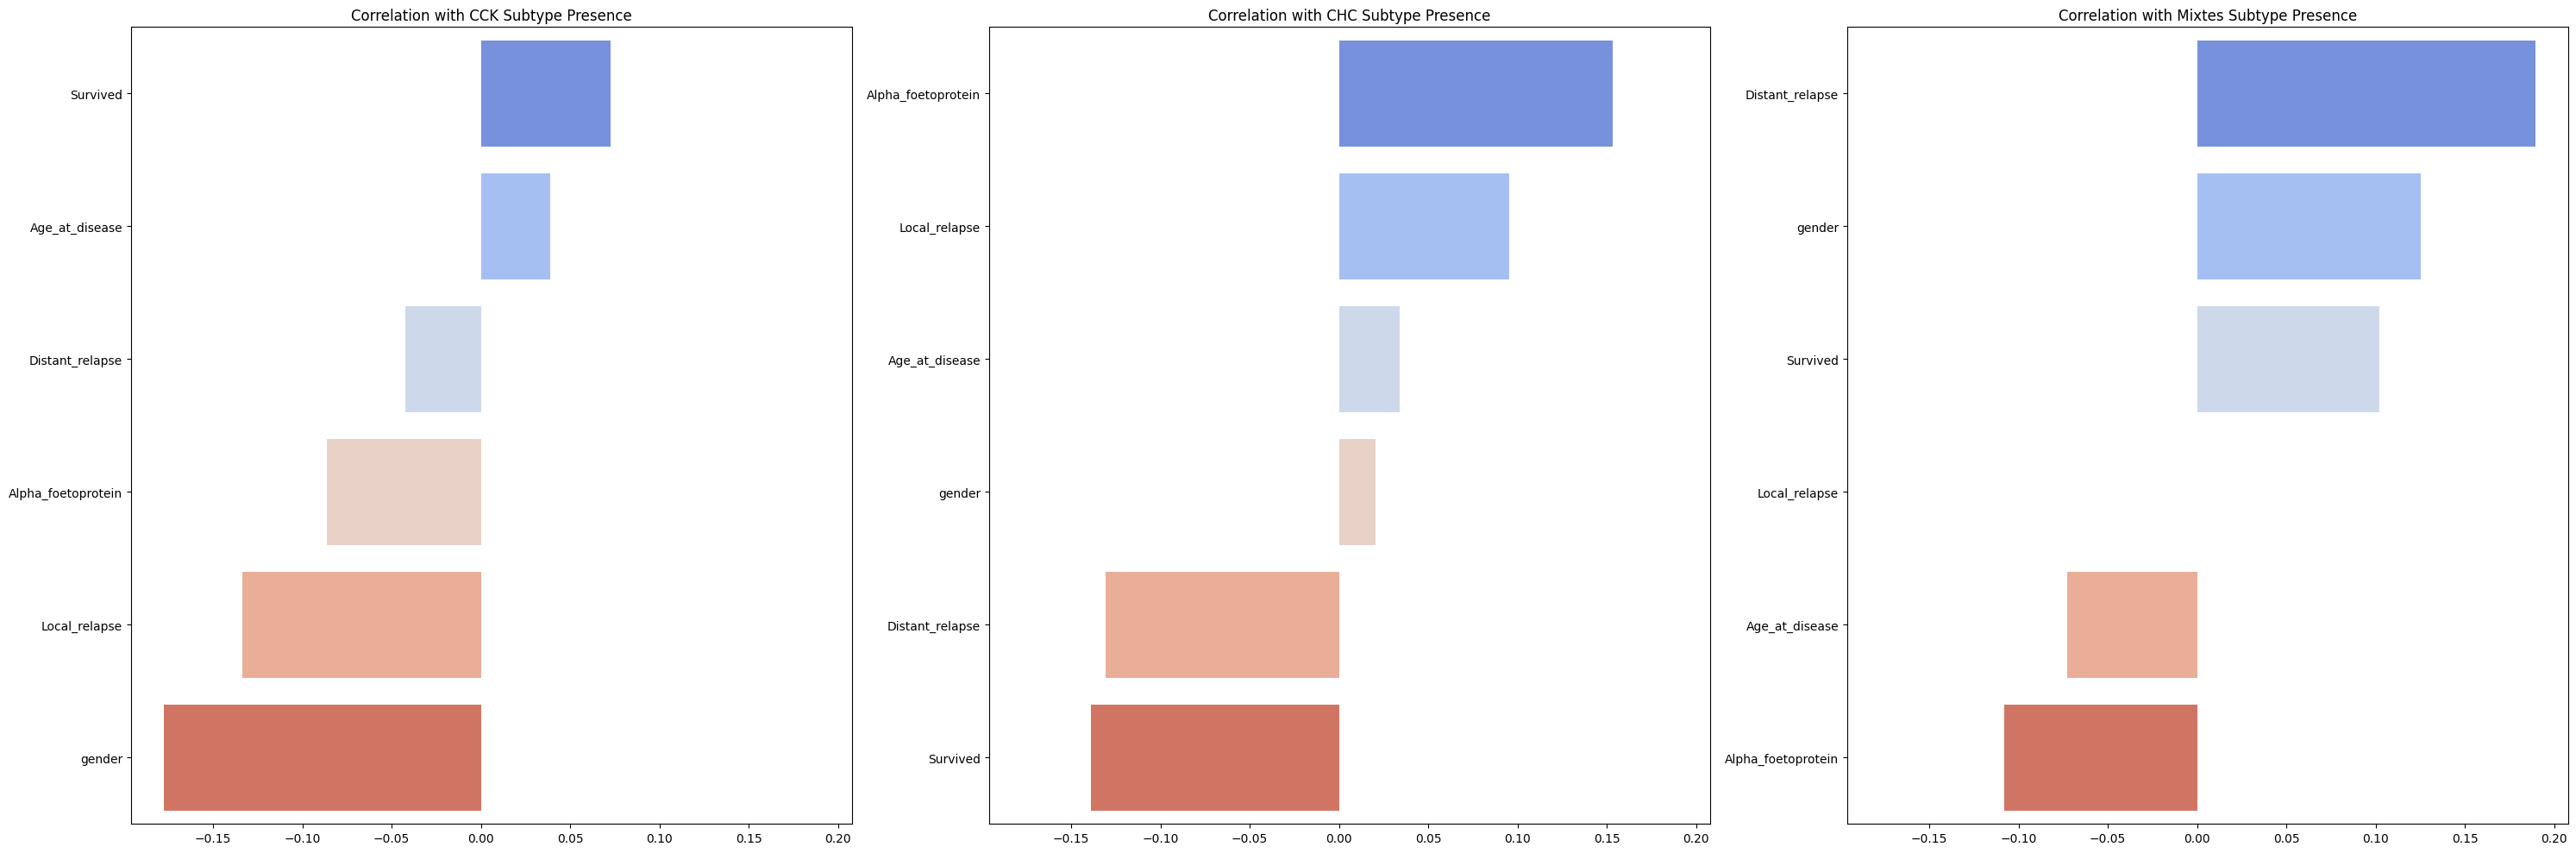

In [ ]:
plot_correl(desc_clean) 

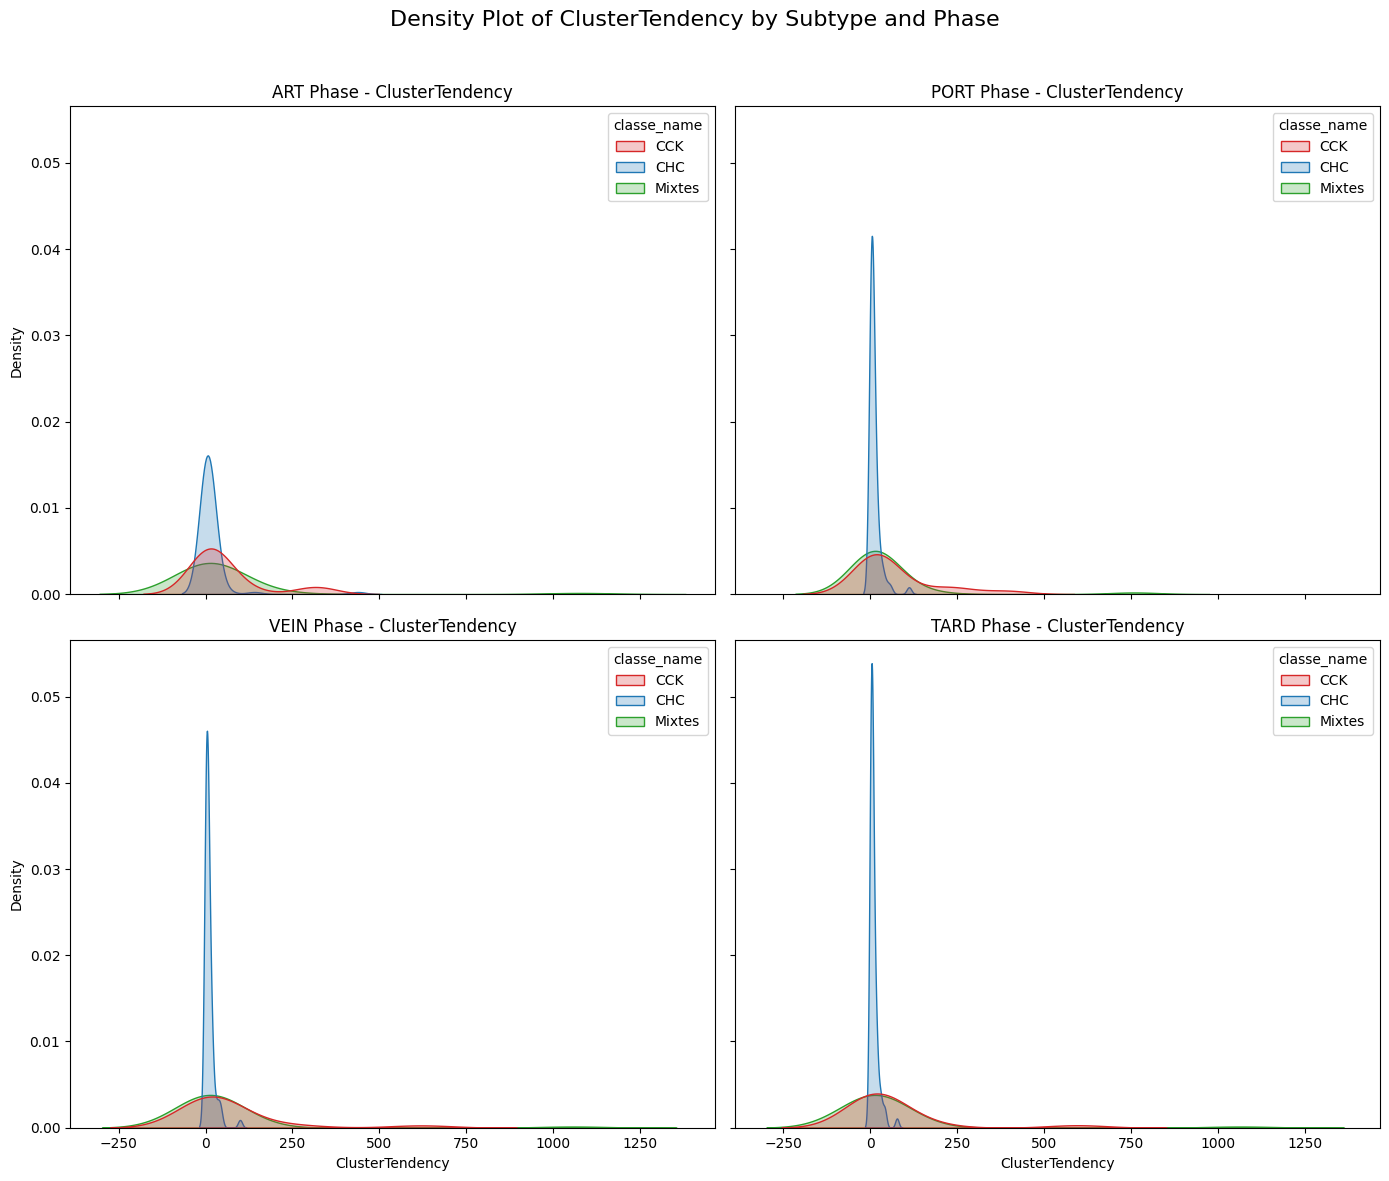

In [ ]:
plot_phase_evolution(global_radio_complete, selected_feature=['original_glcm_ClusterTendency'])

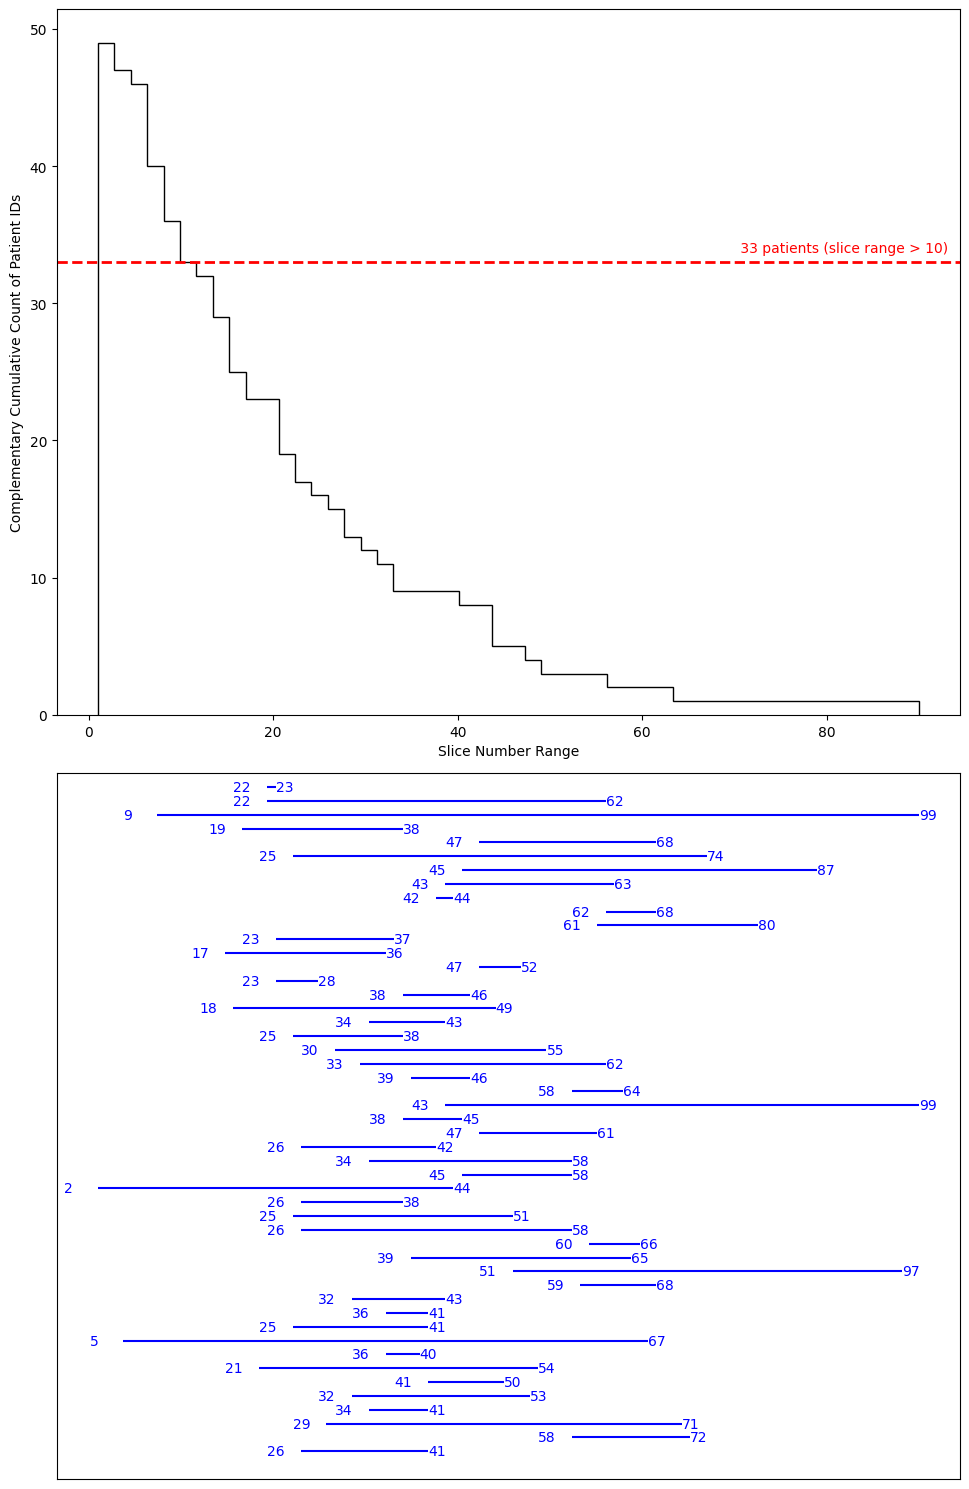

In [ ]:
visualize_slice_ranges(multislice_complete, limit=10)